# ABOUT THIS NOTEBOOK
***
Explore the feedback given by user:
* overall
* by question
* by OS (currently not available)

In [16]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
# requirements to connect
dialect = 'postgresql'
driver = 'psycopg2' #needs to be pre-installed
username = 'shoebuddydev'
password = '8xwHw4pgv3'
host = '@shoebuddydev.c7w9za7n5bby.ap-southeast-1.rds.amazonaws.com'
port = '5432'
database = 'develop'

# connect to PostgreSQL using the basic data shared above
engine = create_engine('{}+{}://{}:{}{}:{}/{}'.format(dialect, driver, username, password, host, port, database))
connection = engine.connect()

# check connection by printing the table names
print(engine.table_names())

['flyway_schema_history', 'combined_arch_type', 'shoe_usage_classification_matrix', 'filter_history', 'usage_classifications', 'shoe_images', 'categories', 'shoe_categories', 'shoe_foot_types', 'accounts', 'foot_types', 'foot_scans', 'feedback_questions', 'options', 'feedback_answers', 'category_audience', 'brands', 'shoe_size_matrix_foot_lengths', 'shoe_size_matrixs', 'foot_width_matrix_widths', 'playing_surface', 'category_playing_surface', 'foot_width_matrix_lengths', 'foot_width_matrixs', 'protection_classifications', 'base_shoe_life', 'user_wishlist', 'users', 'tokens', 'shoe_playing_surface', 'user_unit_measure', 'shoes', 'shoe_widths']


In [10]:
def runQuery(query):
    # ResultProxy
    result_proxy = connection.execute(query)

    # get ResultSet - allowing us to use as little or much data as desired
    results = result_proxy.fetchall()

    # create dataframe with correct headers
    df = pd.DataFrame(results, columns = results[0].keys())
    
    return df 

#### HIGH LEVEL INSIGHTS
***

In [13]:
# write a sql statement
query = 'SELECT * FROM feedback_answers LIMIT 1000'
df = runQuery(query)

df.tail()

id                        account_id  question_id  rate  \
245  246  B1FBD57461200D6F56DEBF81151E676E            1     3   
246  247  B1FBD57461200D6F56DEBF81151E676E            2     3   
247  248  B1FBD57461200D6F56DEBF81151E676E            3     3   
248  249  B1FBD57461200D6F56DEBF81151E676E            4     3   
249  250  B1FBD57461200D6F56DEBF81151E676E            5     3   

                    updated_at                 created_at os version  
245 2018-11-09 03:20:45.134618 2018-11-09 03:20:45.134618  0    None  
246 2018-11-09 03:20:45.141541 2018-11-09 03:20:45.141541  0    None  
247 2018-11-09 03:20:45.145666 2018-11-09 03:20:45.145666  0    None  
248 2018-11-09 03:20:45.149698 2018-11-09 03:20:45.149698  0    None  
249 2018-11-09 03:20:45.154241 2018-11-09 03:20:45.154241  0    None

In [14]:
# write a sql statement
query = 'SELECT COUNT(DISTINCT account_id) FROM feedback_answers LIMIT 1000'
df = runQuery(query)
df

count
0     13

/Users/gijs/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Users/gijs/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


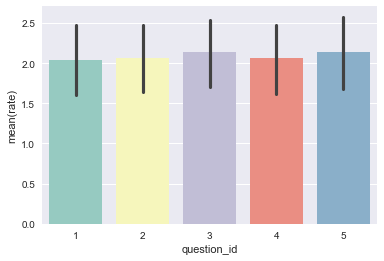

In [42]:
# import table to pandas
query = 'SELECT * FROM feedback_answers LIMIT 1000'
df = runQuery(query)

# calculate average rate
question_average = df.groupby('question_id')['rate'].mean().reset_index()
question_average.columns = [['question_id','avg_score']]

# plot
sns.barplot(x='question_id', y='rate', data = df, palette = 'Set3')
plt.show()

In [44]:
question_average

question_id avg_score
0           1      2.04
1           2      2.06
2           3      2.14
3           4      2.06
4           5      2.14

#### PER QUESTION
***

In [54]:
def findQuestion(question_number):
    query = 'SELECT question FROM feedback_questions where id={} LIMIT 1000'.format(question_number)
    response = runQuery(query)
    return response['question'][0]

In [55]:
def findRate(question_number):
    query = 'SELECT rate FROM feedback_answers where question_id={} LIMIT 1000'.format(question_number)
    response = runQuery(query)
    return response

In [56]:
def performancePerQuestion(question_number):
    #plot
    df = findRate(question_number)
    sns.countplot(x="rate", data=df, palette="Set3")
    plt.title(findQuestion(question_number))
    plt.show()

/Users/gijs/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


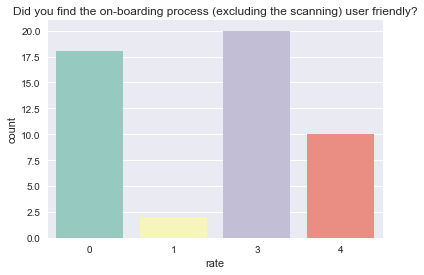

In [57]:
performancePerQuestion(1)

/Users/gijs/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


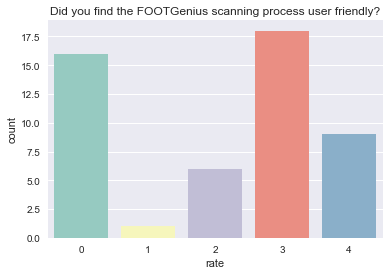

In [58]:
performancePerQuestion(2)

/Users/gijs/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


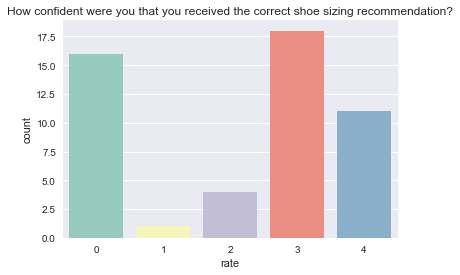

In [59]:
performancePerQuestion(3)

/Users/gijs/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


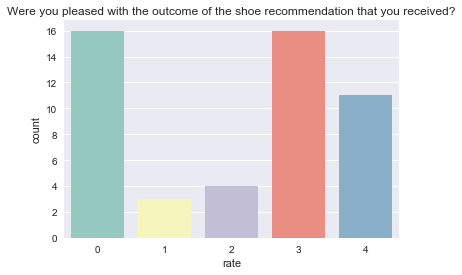

In [60]:
performancePerQuestion(4)